# Description
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

# Goal
To predict whether a customer will leave the bank soon

# Data description
# Features

RowNumber — data string index

CustomerId — unique customer identifier

Surname — surname

CreditScore — credit score

Geography — country of residence

Gender — gender

Age — age

Tenure — period of maturation for a customer’s fixed deposit (years)

Balance — account balance

NumOfProducts — number of banking products used by the customer

HasCrCard — customer has a credit card

IsActiveMember — customer’s activeness

EstimatedSalary — estimated salary
# Target
Exited — сustomer has left

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')   


In [3]:
data= pd.read_csv('Churn (2).csv')

In [5]:
#Overview
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


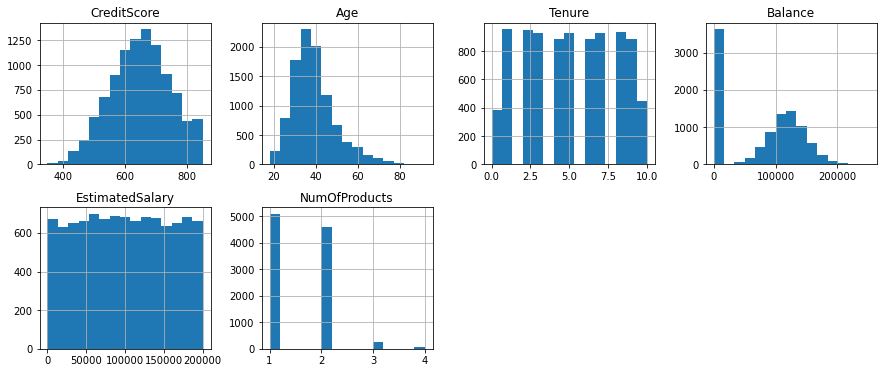

In [8]:
numeric = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts' ]
data[numeric].hist(bins=15, figsize=(15, 6), layout=(2, 4));

# All other numeric data looks correctly looks like the balance columns has alot of customers with zero money in there account 

In [9]:
#lower case all columns 
data.columns = data.columns.str.lower()

In [10]:
#Percentage of missing values 
print(data.isna().sum()*100/len(data))

rownumber          0.00
customerid         0.00
surname            0.00
creditscore        0.00
geography          0.00
gender             0.00
age                0.00
tenure             9.09
balance            0.00
numofproducts      0.00
hascrcard          0.00
isactivemember     0.00
estimatedsalary    0.00
exited             0.00
dtype: float64


Our tenure column is miss 9% of the data. 

In [11]:
data.tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [12]:
#Will fill in missing values in the tenure using the num of products 
data.tenure= data.groupby('numofproducts')['tenure'].fillna(lambda x: x.mean())
print(data.isna().sum())

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64


In [13]:
#checking for duplicates 
duplicates = data[data.duplicated()]
duplicates

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


# EDA

In [14]:
#outliers in our data set 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers

age                 359
balance               0
creditscore          15
customerid            0
estimatedsalary       0
exited             2037
gender                0
geography             0
hascrcard             0
isactivemember        0
numofproducts        60
rownumber             0
surname               0
tenure                0
dtype: int64

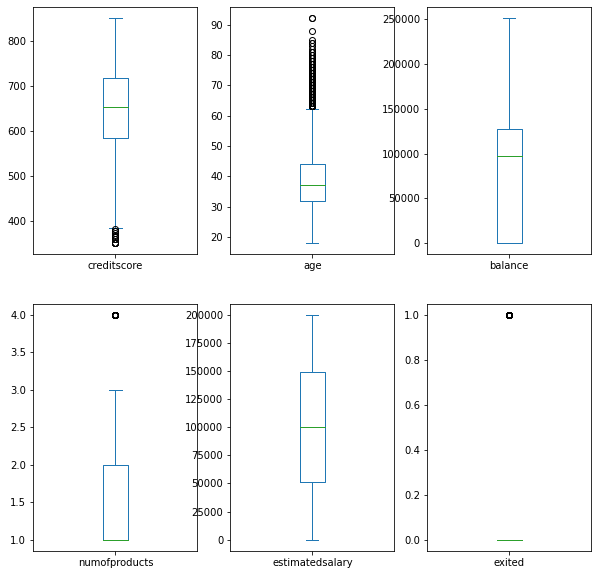

In [15]:
newdf = data.select_dtypes(include=np.number)
newdf = newdf.drop( columns = ['rownumber','customerid','hascrcard','isactivemember'], axis = 1)
#['creditscore', 'age', 'balance', 'numofproducts', 'estimatedsalary'] columns to plot


fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (10,10))
newdf.plot(kind = 'box',subplots=True, ax=axes)
plt.show()

All column seem normally distrubted after reviewing them. We can see that some people have a lower credit score and we have some clients being up to 90 years old. Will leave columns as is. 

## Relationship Between The people who exited and there status

exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: creditscore, dtype: object

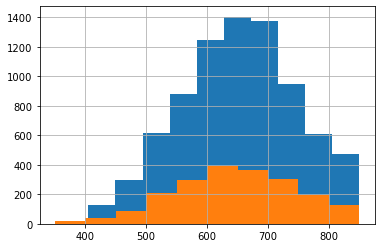

In [16]:
display(data.groupby('exited')['creditscore'].hist())

The majority of the clients have a 600-700 credit score 

exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: geography, dtype: object

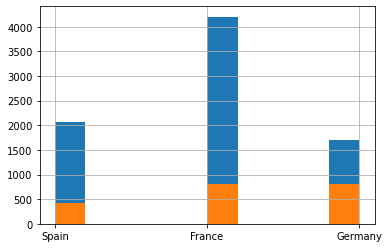

In [17]:
display(data.groupby('exited')['geography'].hist())

majority of over clients are in France

exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: gender, dtype: object

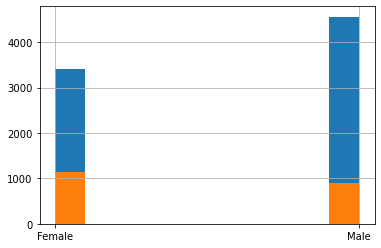

In [18]:
display(data.groupby('exited')['gender'].hist())

Majority of our clients are male but we can see that more females have left the bank.  

exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

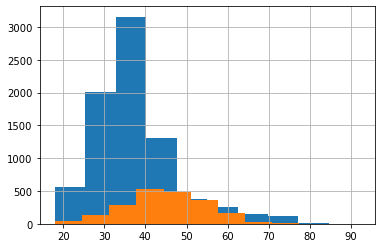

In [19]:
display(data.groupby('exited')['age'].hist())

The majority of our clients are in the there 30-40 but between 40-50 we see the peak of our clients are leaving. Maybe there retiring and moving there money away

939

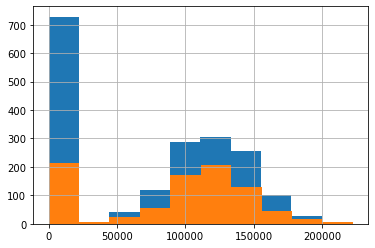

In [20]:
age40_50 = data['age'].between(40,50, inclusive = True)
old = data[age40_50]
old.groupby('exited')['balance'].hist()
#counting the amount of people who have zero money in there account between age 40-50
display(len(old[old['balance'] == 0]))

Almost half of the people in the 40-50 years of age have left the bank due to no money

exited
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: numofproducts, dtype: object

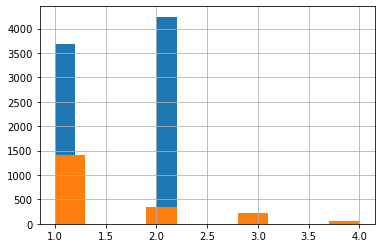

In [22]:
data.groupby('exited')['numofproducts'].hist()

We see that the highest of our clients are leaving because they are only using one product. We need the customers to use more products

# Target Analysis
We can see that surname,rownumber and customerid will not have any value to our model so we can drop this columns

In [23]:
data = data.drop(columns=['rownumber','surname','customerid'], axis =1)

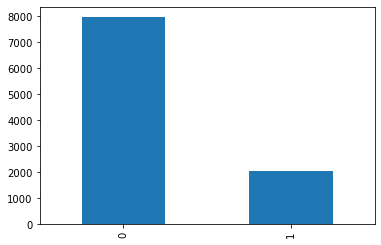

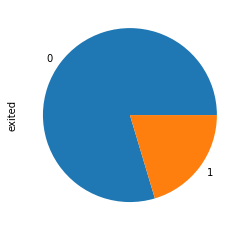

In [24]:
    
data.exited.value_counts().plot(kind='bar')
plt.show()
data["exited"].value_counts(normalize=True).plot.pie()
plt.show()

There is  sigfincant imbalanced between our target varibale. There are less number of customers who have exited then customer who have stayed.

# Splitting data into train,validation, and test set

In [28]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [29]:
X = data_ohe.drop('exited', axis=1)
y = data_ohe['exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

In [32]:
#split the data again from X_train and y_train to get a  valid set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2,stratify = y_train, random_state=12345)

In [33]:
#function to print the variable name 
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]
#looping over the spilt data to get spilt rows and columns
for part in [X_train, y_train, X_test, y_test, X_valid, y_valid]:
    print(namestr(part, globals())[0], part.shape)

X_train (6400, 21)
y_train (6400,)
X_test (2000, 21)
y_test (2000,)
X_valid (1600, 21)
y_valid (1600,)


# Feature Scaling

In [34]:
cols = list(X_train.columns)
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])
X_valid[cols] = scaler.transform(X_valid[cols])

# Preliminary F1 score (baseline)

In [35]:
strategies = ['constant']
test_scores = []

for s in strategies:
    dclf = DummyClassifier(strategy = s, constant = 1, random_state = 12345)
    dclf.fit(X_train, y_train)
    predicted = dclf.predict(X_test)
    score = f1_score(y_test,predicted)*100
    test_scores.append(score)
print(f' Baseline F1 score: {test_scores}')

 Baseline F1 score: [33.81803074366431]


This means that our model should do better then 33.8% of the F1 metric 

# Models with class imbalance

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [37]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier(random_state = 12345)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring = 'f1')

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.5164112494652205


In [38]:
#RandomForestClassifier
hyper = {
    'n_estimators': range(1,50,10),
    'max_depth': randint(1,20)
}


rf = RandomForestClassifier(random_state = 12345)
rfc = RandomizedSearchCV(rf,hyper, cv =5, scoring = 'f1')
rfc.fit(X_train,y_train)
print("Tuned Random Forest Parameters: {}".format(rfc.best_params_))
print("Best score is {}".format(rfc.best_score_))

Tuned Random Forest Parameters: {'max_depth': 13, 'n_estimators': 31}
Best score is 0.550028779931446


In [39]:
param_dist = {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','saga']}
    
lr = LogisticRegression(random_state = 12345)
log = RandomizedSearchCV(lr, param_dist, cv=5, scoring = 'f1')
log.fit(X_train,y_train) 
    
# Print the tuned parameters and score
print("Tuned LogisticRegressionParameters: {}".format(log.best_params_))
print("Best score is {}".format(log.best_score_))

Tuned LogisticRegressionParameters: {'solver': 'saga', 'penalty': 'l2', 'C': 10000.0}
Best score is 0.29611807549307645


We can see that Random Forest model had the hightest with a total of 55%

# Class imbalance correction and hyper parameter tuning
In this section we will try to correct class imbalance using the following methods:

Class Weight Adjustment;

Upsampling

In [42]:
# Class Weight Adjustment

In [43]:
#LogisticRegression Model
solver = ['liblinear', 'newton-cg', 'lbfgs', 'saga']

for j in solver:
    model = LogisticRegression(random_state=12345, solver= j, class_weight = 'balanced')
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    print('F1:', f1_score(y_valid, predicted_valid))

F1: 0.5229759299781183
F1: 0.5229759299781183
F1: 0.5229759299781183
F1: 0.5229759299781183


In [44]:
model = LogisticRegression(random_state=12345, solver= j, class_weight = 'balanced')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print('Our best LR model is :', f1_score(y_valid, predicted_valid).max())

Our best LR model is : 0.5229759299781183


In [45]:
#RandomForestClassifier

hyper = []

for x in range(1,50,10):
    for depth in range(1,20):
        model = RandomForestClassifier(random_state = 12345, n_estimators = x, max_depth = depth,class_weight = 'balanced')
        model.fit(X_train, y_train)
        predicted_valid = model.predict(X_valid)
        result = round(f1_score(y_valid, predicted_valid),5)
        hyper.append({'n_estimators':x , 'max_depth':depth, 'F1score':result})
        

In [46]:
#The best parameters for Random Forest Classifer         
best = pd.DataFrame(hyper, columns = ['n_estimators','max_depth','F1score'])
best_para = best[best['F1score'] == best['F1score'].max()]
best_para

,n_estimators,max_depth,F1score
66,31,10,0.65103


In [47]:
for depth in range(1, 11):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight = 'balanced') # create a model with the given depth
	model.fit(X_train, y_train) # train the model
	dec_tree = model.predict(X_valid) # get the model's predictions
	dec_result = round(f1_score(y_valid,dec_tree),5) # calculate the accuracy
	print(f'The max_depth {depth}: {dec_result}')

The max_depth 1: 0.5
The max_depth 2: 0.50415
The max_depth 3: 0.52519
The max_depth 4: 0.54202
The max_depth 5: 0.58195
The max_depth 6: 0.55371
The max_depth 7: 0.5721
The max_depth 8: 0.54654
The max_depth 9: 0.53721
The max_depth 10: 0.54988


In [48]:
decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight = 'balanced')
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_valid)

acc_tree = round(f1_score(y_valid,pred) , 5)
print(f'Our best Decision Tree Model is:{acc_tree}')

Our best Decision Tree Model is:0.55371


# Upsampling

In [49]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    X_train, y_train, 10)

In [50]:
#LogisticRegression Model
solver = ['liblinear', 'newton-cg', 'lbfgs', 'saga']

for j in solver:
    model = LogisticRegression(random_state=12345, solver= j)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(X_test)
    print('F1:', f1_score(y_test, predicted_valid))

F1: 0.41144708423326126
F1: 0.41144708423326126
F1: 0.41144708423326126
F1: 0.41144708423326126


In [51]:
LR = LogisticRegression( random_state=12345, solver = 'saga' )
LR.fit(features_upsampled, target_upsampled)   
y_pred = LR.predict(X_test)

acc_LR = round(f1_score(y_test,y_pred),5)
print(f' Our best LR model is {acc_LR}')

 Our best LR model is 0.41145


In [52]:
hyper = []

for x in range(1,50,10):
    for depth in range(1,20):
        model = RandomForestClassifier(random_state = 12345, n_estimators = x, max_depth = depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(X_test)
        result = round(f1_score(y_test, predicted_valid),5)
        hyper.append({'n_estimators':x , 'max_depth':depth, 'F1score':result})

In [53]:
#The best parameters for Random Forest Classifer         
best = pd.DataFrame(hyper, columns = ['n_estimators','max_depth','F1score'])
best_para = best[best['F1score'] == best['F1score'].max()]

In [54]:
for depth in range(1, 11):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
	model.fit(features_upsampled,target_upsampled) # train the model
	dec_tree = model.predict(X_test) # get the model's predictions
	dec_result = round(f1_score(y_test, dec_tree),5) # calculate the accuracy
	print(f'The max_depth {depth}: {dec_result}')

The max_depth 1: 0.33818
The max_depth 2: 0.49208
The max_depth 3: 0.4239
The max_depth 4: 0.4239
The max_depth 5: 0.46885
The max_depth 6: 0.51814
The max_depth 7: 0.52648
The max_depth 8: 0.4727
The max_depth 9: 0.50584
The max_depth 10: 0.49483


In [55]:
decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=6)
decision_tree.fit(features_upsampled,target_upsampled)
pred = decision_tree.predict(X_test)

acc_tree = round(f1_score(y_test,pred) , 5)
print(f'Our best Decision Tree Model is:{acc_tree}')

Our best Decision Tree Model is:0.51814


# Retrain the best tuned model 

In [57]:
rf = RandomForestClassifier(random_state = 12345, n_estimators =31, max_depth = 9,class_weight = 'balanced')
rf.fit(X_train, y_train)
predicted_valid = rf.predict(X_test)
result = round(f1_score(y_test, predicted_valid),5)
print(result)

0.62883


# Santiy Check 

We can that our baseline Dummy Classifer model had a 33.8% and Our Random Forest classifer had a 63% which is a 29.2% increase

# AUC-ROC
To find how much our model differs from the random model, let's calculate the AUC-ROC value (Area Under Curve ROC) This is an evaluation metric with values in the range from 0 to 1. The AUC-ROC value for a random model is 0.5

In [59]:
probabilities_test = rf.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]

In [60]:
auc_roc = round(roc_auc_score(y_test, probabilities_one_test) * 100, 2)
auc_roc

86.12

The AUC-ROC value is very high, it means that our model's predictions are correct in more than 85% of cases

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) 

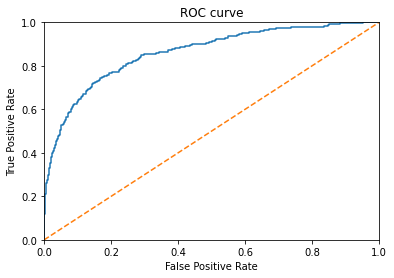

In [63]:
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC curve')
plt.show()

#  Conclusion

In this project we have developed a binary classification model on an imbalanced dataset that analyzes data on clients’ past behavior and termination of contracts with the bank and predicts whether a customer will leave the bank soon
In the following section we have performed an exploratory data analysis and reached the following conclusions
Most clients are located in France and they are the most loyal to the bank among all countries, on average. Most clients are male. Female clients leave the bank more often. We noticed that our target classes are imbalanced: there are more than twice as many observations when a client stayed with the bank than of those who left. As one way to correct it, we used the stratify parameter while splittig data into train and test sets. It makes a split so that the proportion of values in the sample produced will be the same as the proportion of values in the target variable.
    In the following step I tried correcting the imbalance target with 2 methods using 
Class weight adjustment and upsampling
I have also tuned each of the 3 chosen algorithms (Decision Tree, Random Forest and Logistic Regression) and searched for the best hyperparameters in order to select the best mode
Random Forest was our best model using class weight adjustment showing 63% on the intial data
Finally, we have calculated the AUC-ROC value and it turned out to be 86.19%, which means that our model's predictions are correct in more than 86% of cases. We have also plotted the ROC curve. its ROC curve is much higher than the diagonal
